### [피로도](https://school.programmers.co.kr/learn/courses/30/lessons/87946?language=python3)

In [20]:
from itertools import permutations

def solution(k, dungeons):
    answer = 0
    for case in permutations(dungeons):
        stemina = k
        for n, (need, use) in enumerate(case, start=1):
            if stemina >= need:
                stemina -= use
            else:
                n -= 1
                break
        answer = max(n, answer)
    return answer

In [21]:
k, dungeons = 8, [[7, 3], [5, 4], [1, 1]]
solution(k, dungeons)

3

In [22]:
k, dungeons =  10, [[9, 2], [10, 3], [7, 3], [5, 4], [1, 1]]
solution(k, dungeons)

4

### [구명보트](https://school.programmers.co.kr/learn/courses/30/lessons/42885)

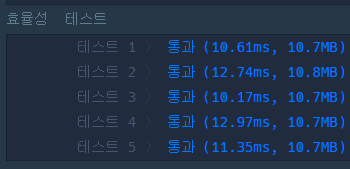

In [34]:
from collections import deque

def solution(people, limit):
    people.sort(reverse=True)
    people = deque(people)
    answer = 0
    while people:
        if len(people) > 1 and people[0]+people[-1] <= limit:            
            people.pop()
        people.popleft()
        answer += 1
    return answer

- 굳이 deque를 쓰지 않고 풀기
- array에서 원소를 빼는 과정 대신, 인덱스를 기반으로 처리

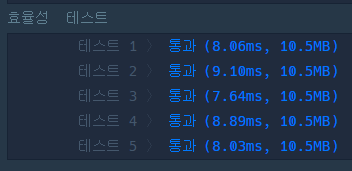

In [ ]:
def solution(people, limit):
    people.sort()
    
    s, e = 0, len(people)-1
    answer = 0
    while s <= e:
        if people[s]+people[e] <= limit:            
            s += 1
        e -= 1
        answer += 1
    return answer

In [35]:
people, limit = [70, 50, 80, 50], 100
solution(people, limit)

3

In [36]:
people, limit = [70, 80, 50], 100
solution(people, limit)

3